<a href="https://colab.research.google.com/github/RKNahid/ML_815/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
a1 = pd.read_excel("/content/drive/MyDrive/Project/Assignment1/customer_churn_prediction.xlsx")

target = "Churn"

**Show first five row**

In [ ]:
a1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Show shape of dataset**

In [ ]:
a1.shape

(7043, 21)

**Display whether there is null value or not and if so handle those**

In [ ]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*There are null Values in TotalCharges column. Lets handle this column*

In [ ]:
a1['TotalCharges'] = a1['TotalCharges'].fillna(a1['TotalCharges'].mean())

a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Count target values**

In [ ]:
a1_c = a1['Churn'].value_counts()

print(a1_c)

No     5174
Yes    1869
Name: Churn, dtype: int64


**Plot target values**

In [ ]:
import matplotlib.pyplot as plt

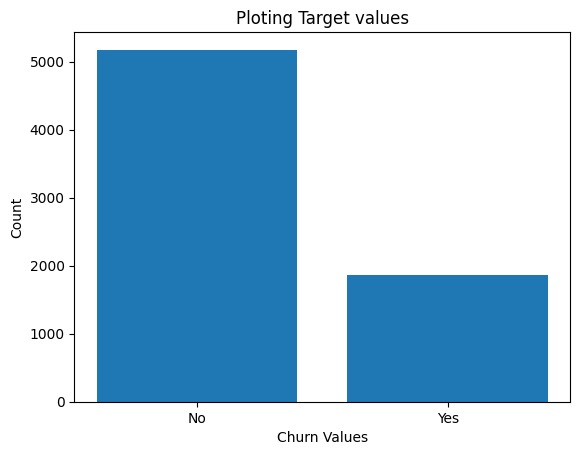

In [ ]:
plt.bar(a1_c.index, a1_c.values)

plt.xlabel('Churn Values')
plt.ylabel('Count')
plt.title('Ploting Target values')

plt.show()

**Preprocess the data by encoding (Use label encoder technique)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

a1[target] = en.fit_transform(a1[target])

In [ ]:
sorted(list(set(a1[target])))

[0, 1]

In [ ]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*Lets Label Encode all the object columns*

In [ ]:
obj_col = a1.select_dtypes(include=['object']).columns

en1 = LabelEncoder()

a1[obj_col] = a1[obj_col].apply(lambda col: en1.fit_transform(col))

In [ ]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


**Apply hold out cross validation and show the training and test score (Use Logistic Regression Algorithm only)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = a1.loc[:,a1.columns != target]
y = a1[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
a1[target].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts()

0    4135
1    1499
Name: Churn, dtype: int64

In [ ]:
x_train, y_train = balance(x_train, y_train)

In [ ]:
y_train.value_counts()

0    4135
1    4135
Name: Churn, dtype: int64

In [ ]:
tr = LogisticRegression(max_iter=1000)

tr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
train_score = tr.score(x_train, y_train)
test_score = tr.score(x_test, y_test)

print("Training score:", round(train_score*100))
print("Test score:", round(test_score*100))

Training score: 81
Test score: 77


**Apply k fold cross validation (Use Logistic Regression Algorithm only)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
x = a1.loc[:,a1.columns != target]
y = a1[target]

In [ ]:
score = cross_val_score(LogisticRegression(max_iter=1000), x, y, cv=5)
print(score)

[0.80411639 0.80482612 0.78708304 0.8125     0.80397727]


In [ ]:
print("Min Score", np.min(score))
print("Max Score", np.max(score))
print("Avg Score", np.mean(score))

Min Score 0.78708303761533
Max Score 0.8125
Avg Score 0.8025005645525518


**Apply stratified k fold cross validation (Use Logistic Regression Algorithm only)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
x = a1.loc[:,a1.columns != target]
y = a1[target]

In [ ]:
scok = cross_val_score(LogisticRegression(max_iter=1000), x, y, cv=7)
print(scok)

[0.79543198 0.80417495 0.81411531 0.79324056 0.81212724 0.79920477
 0.81312127]


In [ ]:
print("Min Score", np.min(scok)*100, "%")
print("Max Score", np.max(scok)*100, "%")
print("Avg Score", np.mean(scok)*100, "%")

Min Score 79.32405566600397 %
Max Score 81.41153081510934 %
Avg Score 80.44880102277526 %


**Apply leave one out cross validation (Use Logistic Regression Algorithm only)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [ ]:
x = a1.loc[:,a1.columns != target]
y = a1[target]

In [ ]:
lo = LeaveOneOut()
scol = cross_val_score(LogisticRegression(max_iter=1000, n_jobs=-1), x, y, cv=lo)
print(scol)

In [ ]:
print("Avg Score", np.mean(scol)*100, "%")